In [ ]:
%pip install numpy
%pip install matplotlib
%pip install ffmpeg

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.colors import BoundaryNorm
from google.colab import files
from IPython.display import display
import PIL

In [4]:
def energy_calculator(spin_array: np.ndarray , lattice_size: int , coupling_strength: float = 0.0) -> float:
  """
  To calculate the energy for a given configuration of spins in the lattice

  Parameters:
  -----------
  spin_array : np.ndarray
    A 2-D array describing the spin configuration of the system

  lattice_size : int
    No of lattice sites along one edge of the lattice (square lattice)

  coupling_strength : float
    Strength of the coupling between the applied magnetic field (assumed in +1/2 direction)
    Default setting = 0 (no magnetic field)

  Returns:
  --------
  energy : float
    The energy of the given configuration of spins
  """
  energy = 0.0

  # Adding energy contributions from the spin-spin interaction for nearest neighbours
  for i in range(lattice_size):
    for j in range(lattice_size):
        energy -= np.dot(spin_array[i][j] , spin_array[i][(j+1) % lattice_size])
        energy -= np.dot(spin_array[i][j] , spin_array[(i+1) % lattice_size][j])

        # Adding energy contribution from the magnetic field-spin interaction
        energy -= 0.5 * coupling_strength * spin_array[i][j]

  return energy

In [5]:
def plot_energy_with_time(energy_array: np.ndarray, T: float, number_of_updates: int, lattice_size: int) -> None:
    """
    Plots the energy as a function of number of updates for a given temperature.

    Parameters:
    -----------
    energy_array : np.ndarray
        A 1D array containing the energy values for each update.

    T : float
        Temperature value to display in the title.

    number_of_updates : int
        Total number of updates performed over the entire lattice

    Returns:
    --------
    None
        Displays the plot.
    """

    # Calculating energy means and varainces after thermalization
    energy_mean = np.array(energy_array[int(len(energy_array) / 10) :]).mean()
    energy_var = np.array(energy_array[int(len(energy_array) / 10) :]).var()

    fig, ax = plt.subplots(figsize=(8, 5))

    # Improve plot readability
    ax.set_xlabel("Number of Updates", fontsize=12)
    ax.set_ylabel("Energy", fontsize=12)
    ax.set_title(f"Energy vs Number of Updates at T = {T}\nAverage Energy = {energy_mean:.2f}\nEnergy Std. Dev. = {energy_var ** 0.5:.2f}", fontsize=14)
    ax.set_xlim(left = 0, right = len(energy_array))
    ax.plot(energy_array, color="b", linewidth=1.5, label="Energy")
    ax.set_xticks(np.linspace(0, number_of_updates * lattice_size ** 2, 11))
    ax.set_xticklabels(np.linspace(0, number_of_updates, 11))
    ax.legend()


    # Display the plot
    plt.show()

In [10]:
def make_color_mesh(spin_array: np.ndarray, T: float, cmap: str = "coolwarm") -> plt.figure:
    """
    Plots a color mesh of the spin configuration.

    Parameters:
    -----------
    spin_array : np.ndarray
        A 2D array representing the spin configuration of the system.

    T : float
        Temperature value to display in the title.

    cmap : str, optional
        Colormap for visualization. Default is "coolwarm".

    Returns:
    --------
    fig : plt.figure
        Returns figure to be animated
    """

    lattice_size = spin_array.shape[0]  # Assuming square lattice

    x = np.linspace(0, 1, lattice_size)
    y = np.linspace(0, 1, lattice_size)
    X, Y = np.meshgrid(x, y)

    fig, ax = plt.subplots(figsize=(8, 8))

    map = plt.get_cmap(cmap)
    bounds = [-1.5, 0, 1.5]
    norm = BoundaryNorm(bounds, map.N)

    c = ax.pcolormesh(X, Y, spin_array, cmap=cmap, shading="auto", norm=norm)

    # Add colorbar and title
    fig.colorbar(c, ax=ax, label="Spin Value")
    plt.title(f"Spin Configuration at T = {T}")

    # Set aspect ratio for better visualization
    ax.set_aspect("equal")
    ax.set_xlabel("X-axis (Lattice)")
    ax.set_ylabel("Y-axis (Lattice)")

    fig.canvas.draw()
    image = np.array(fig.canvas.renderer.buffer_rgba())

    plt.close(fig)  # Prevent immediate display
    return image

Temperature = 1e-06
Update no. 0


<ipython-input-7-a730b5630ff5>:35: RuntimeWarning: overflow encountered in exp
  prob_switch = min(1, np.exp(- (new_energy - old_energy) / temperature))


Update no. 10
Update no. 20
Update no. 30
Update no. 40


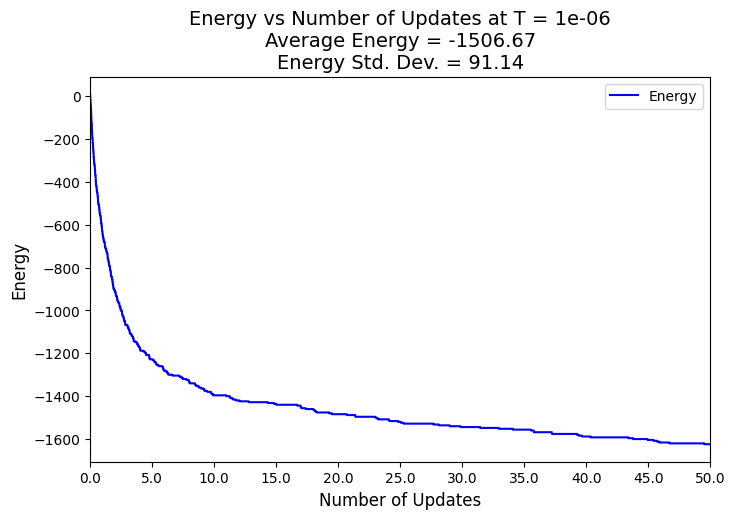

Temperature = 1
Update no. 0
Update no. 10
Update no. 20
Update no. 30
Update no. 40


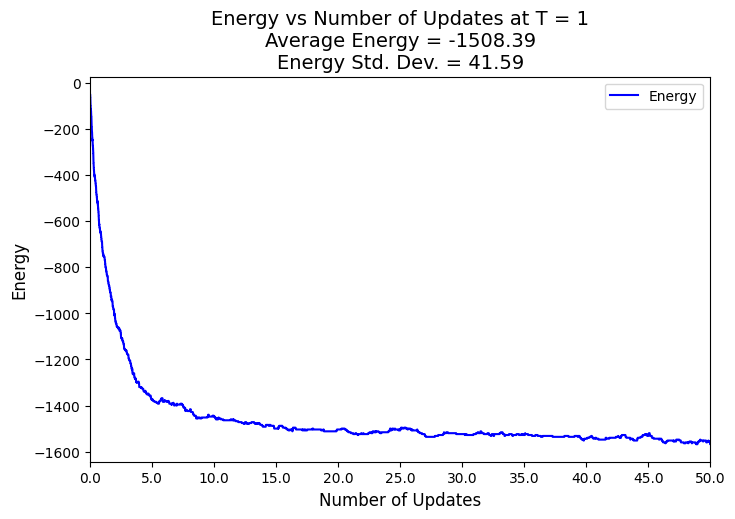

Temperature = 2
Update no. 0
Update no. 10
Update no. 20
Update no. 30
Update no. 40


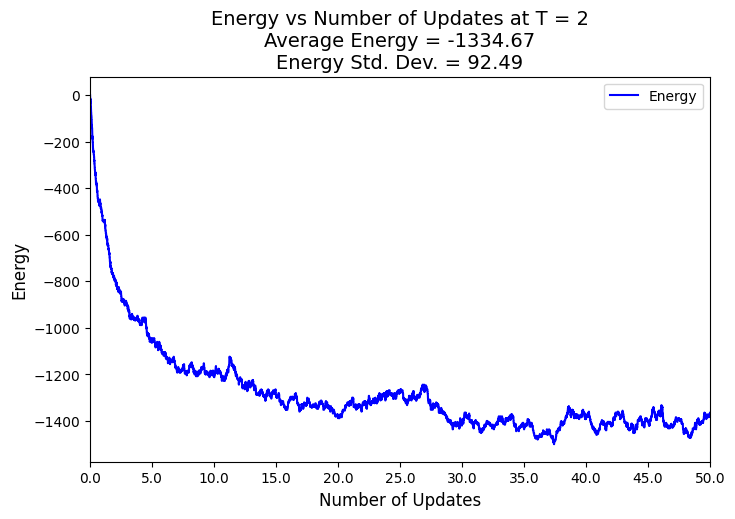

Temperature = 3
Update no. 0
Update no. 10
Update no. 20
Update no. 30
Update no. 40


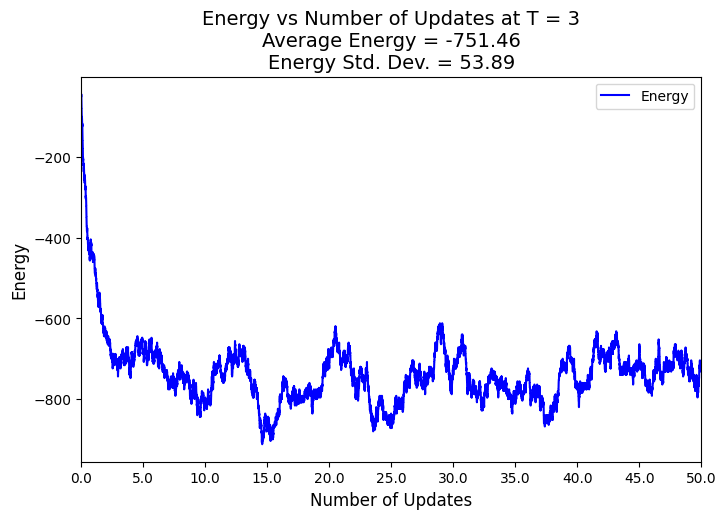

Temperature = 4
Update no. 0
Update no. 10
Update no. 20
Update no. 30
Update no. 40


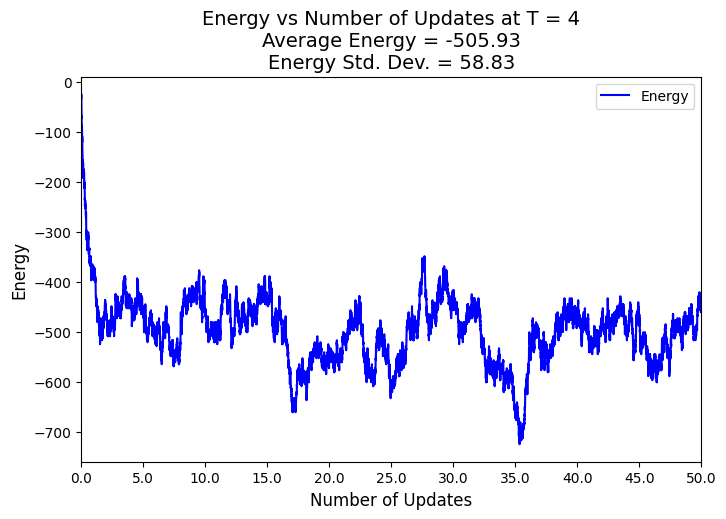

Temperature = 5
Update no. 0
Update no. 10
Update no. 20
Update no. 30
Update no. 40


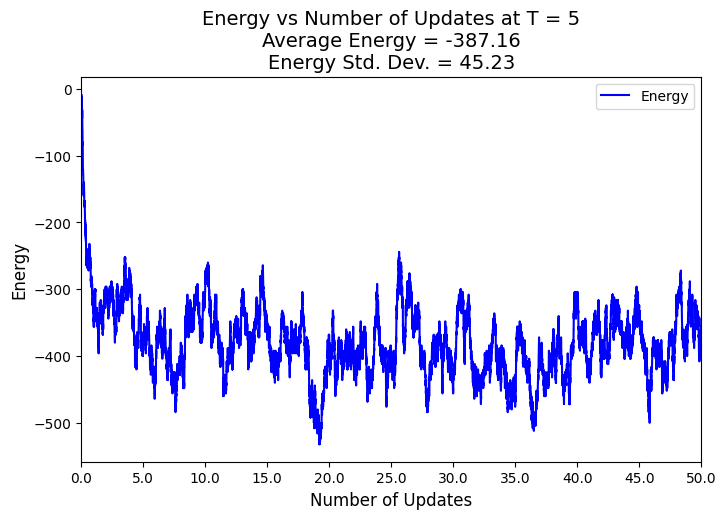

Temperature = 6
Update no. 0
Update no. 10
Update no. 20
Update no. 30
Update no. 40


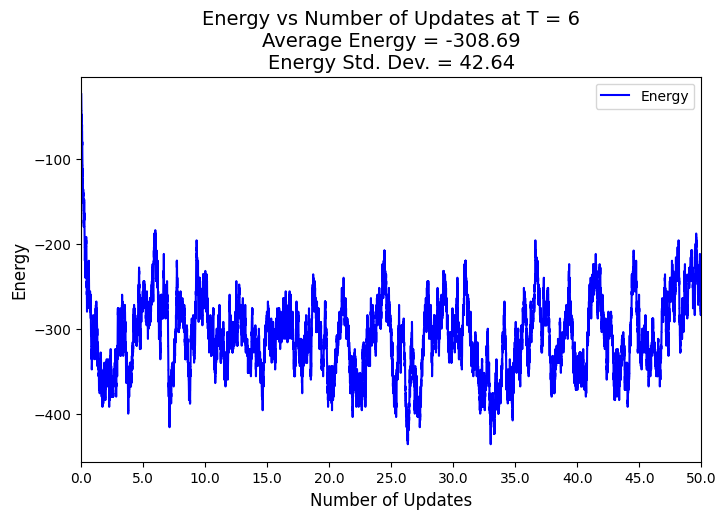

Temperature = 7
Update no. 0
Update no. 10
Update no. 20
Update no. 30
Update no. 40


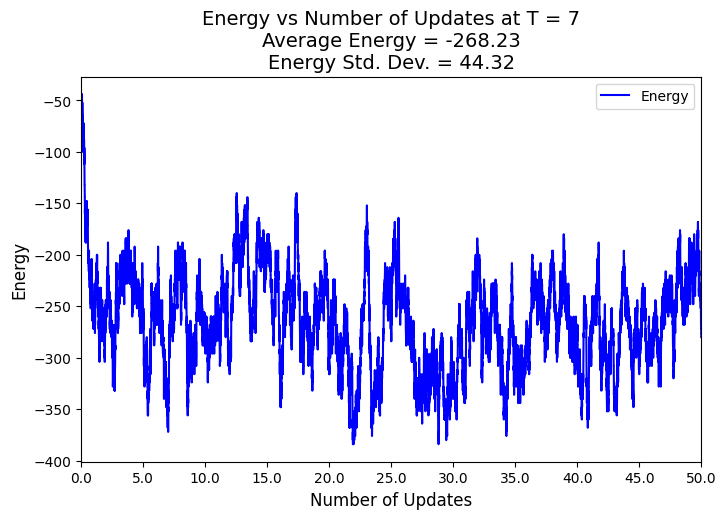

In [7]:
# Setting basic lattice parameters
lattice_size = 30
number_of_updates = int(50)

# Defining temperature range over which model has to be simulated
T_array = [1e-6,1,2,3,4,5,6,7]
M_array = [] # Array to store magnetization values
anim_array = {T:[] for T in (T_array)}

for temperature in T_array:

  print("Temperature = " + str(temperature))

  # Initializing spin_array which stores configurations of the spins
  spin_array = np.random.choice([-1,1], size = (lattice_size, lattice_size))
  energy_array = [] # Array to store energy values as updates happen
  temp_m_array = [] # Array to store and calculate average magnetization

  # Looping such that there in one update, each lattice_site gets a chance to swap states
  for i in range(number_of_updates * lattice_size ** 2):

    if i % (lattice_size ** 2 * 10) == 0:
      print("Update no. " + str(int(i / (lattice_size ** 2))))

    if i % int((number_of_updates * lattice_size ** 2) / 100) == 0:
      anim_array[temperature].append(make_color_mesh(spin_array, temperature))

    new_state = spin_array.copy()
    lattice_x, lattice_y = np.random.randint(0, lattice_size, size = 2) # Choosing random site
    new_state[lattice_x][lattice_y] *= -1 # Flipping spin

    # Applying Metropolis update
    new_energy = energy_calculator(new_state, lattice_size)
    old_energy = energy_calculator(spin_array, lattice_size)
    prob_switch = min(1, np.exp(- (new_energy - old_energy) / temperature))
    if prob_switch > np.random.rand():
        spin_array = new_state

    energy_array.append(energy_calculator(spin_array, lattice_size))
    magnetization = np.abs(np.sum(spin_array)) # Calculating magnetization
    temp_m_array.append(magnetization)

  M_array.append(np.array(temp_m_array[int(len(temp_m_array) / 10) :]).mean())

  # Plotting results
  plot_energy_with_time(energy_array, temperature, number_of_updates, lattice_size)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

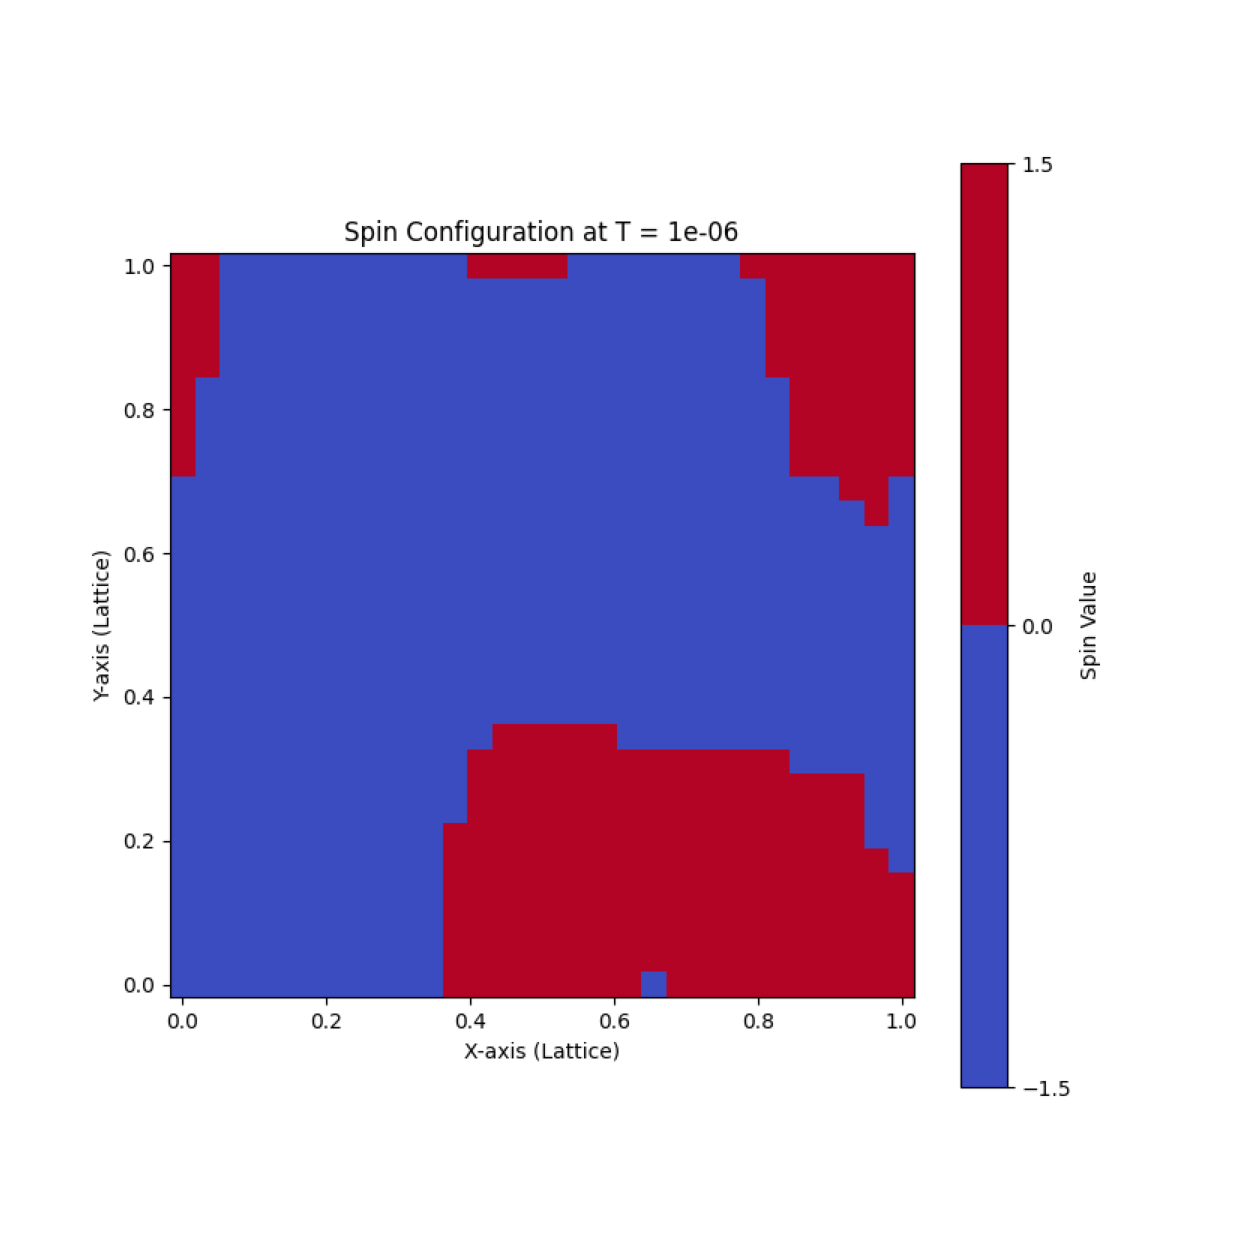

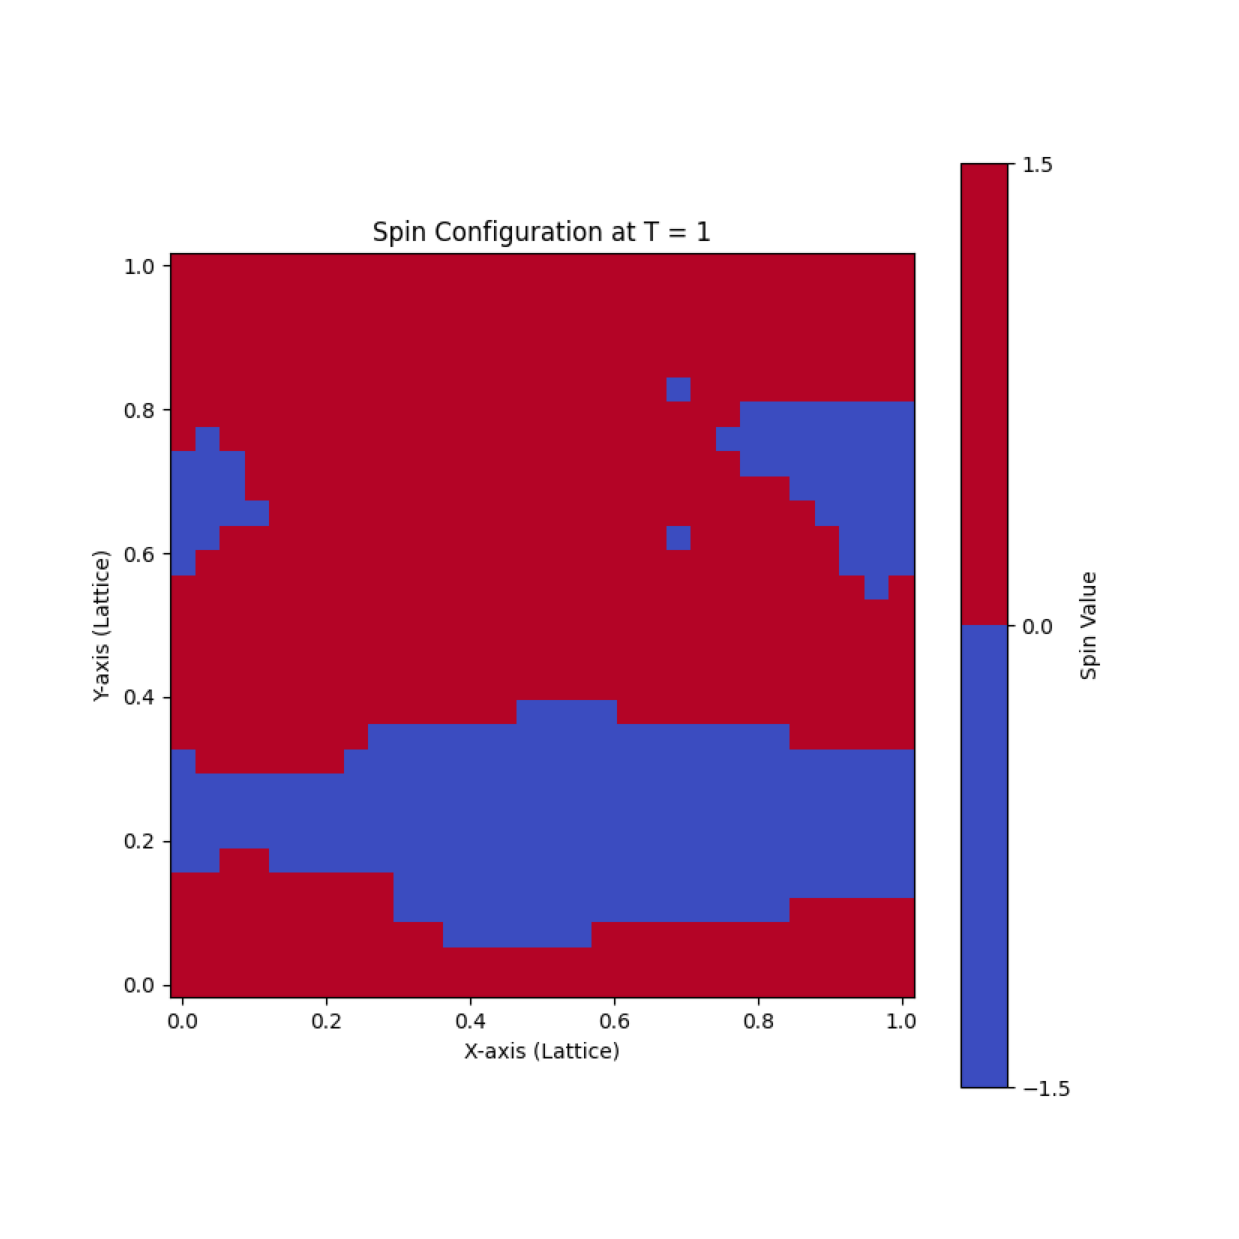

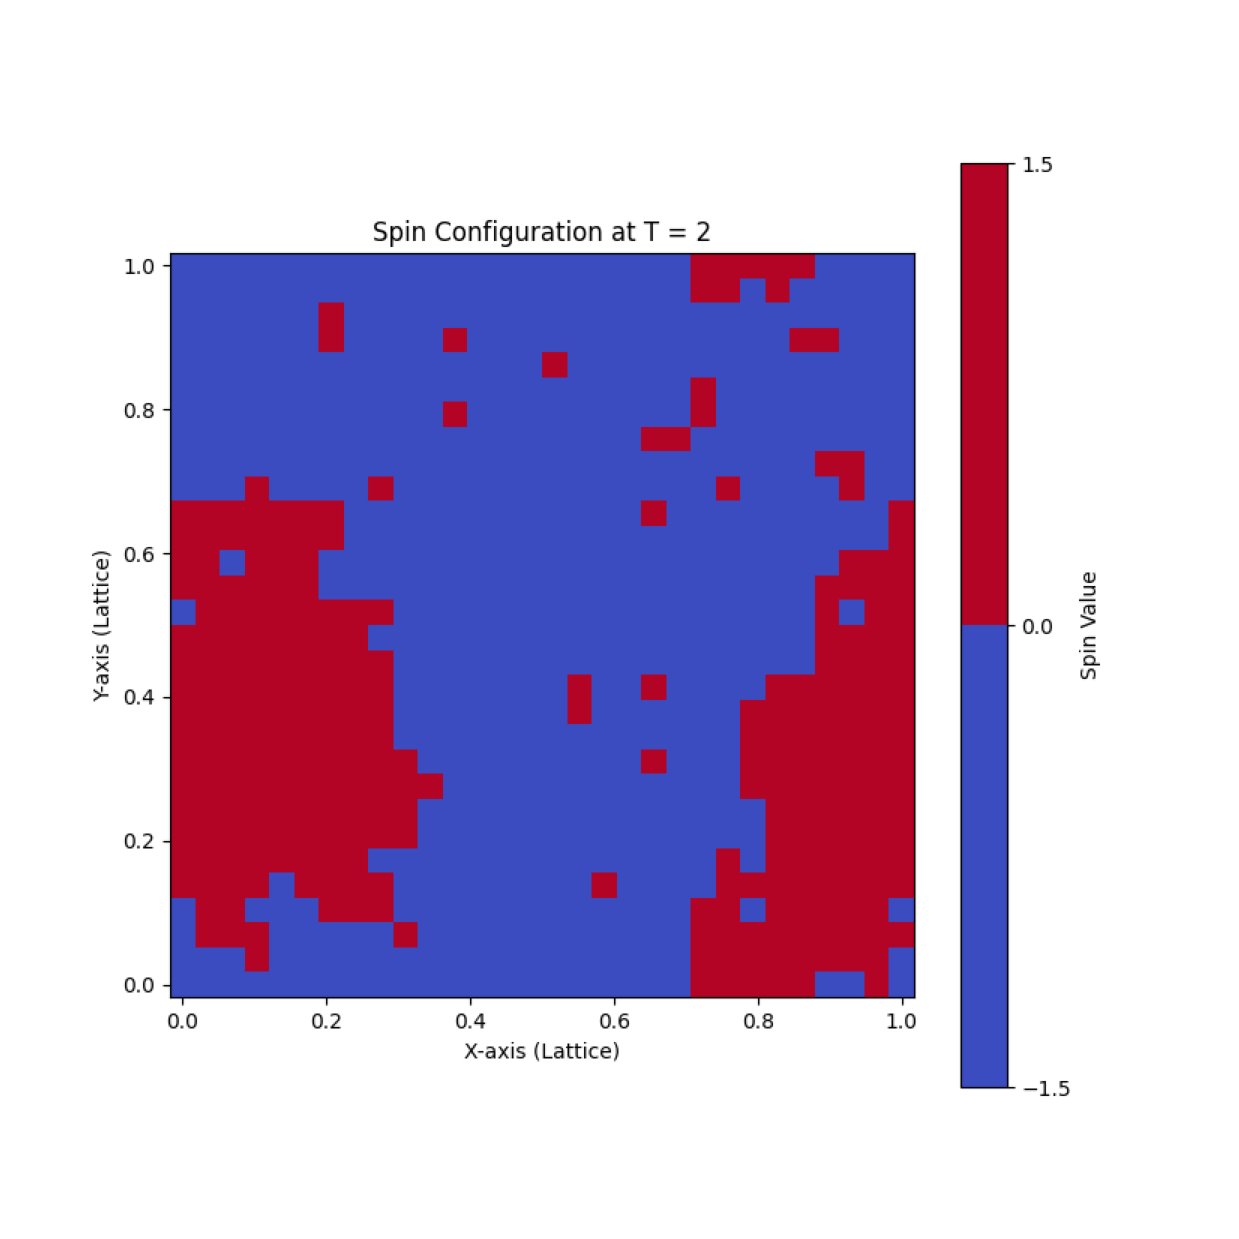

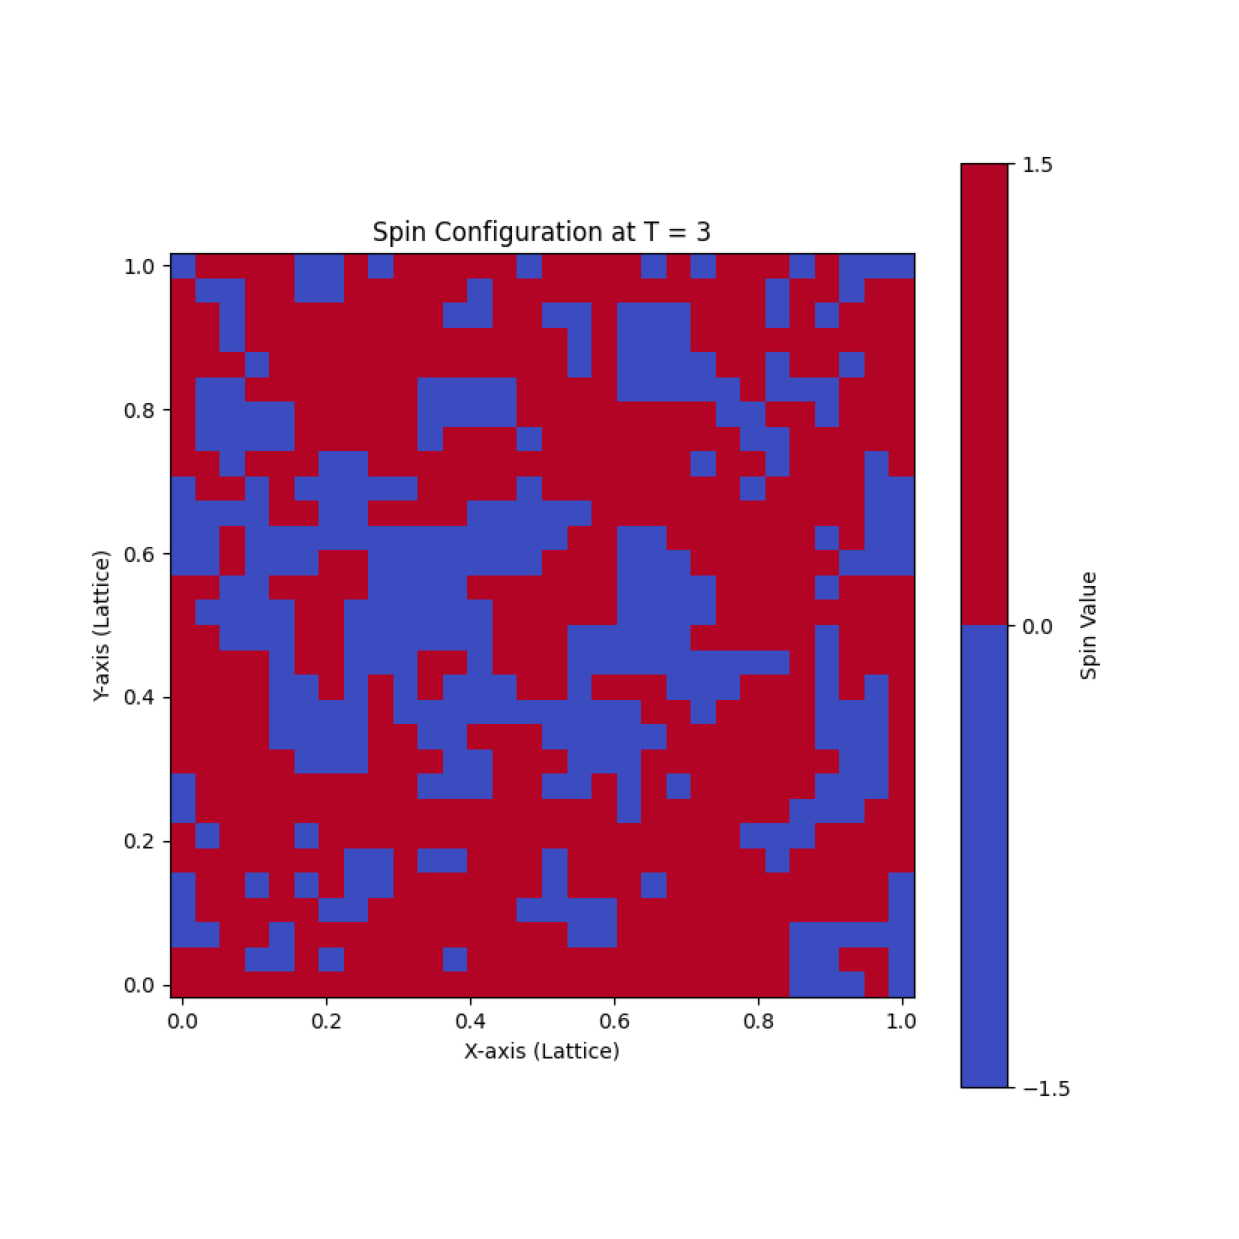

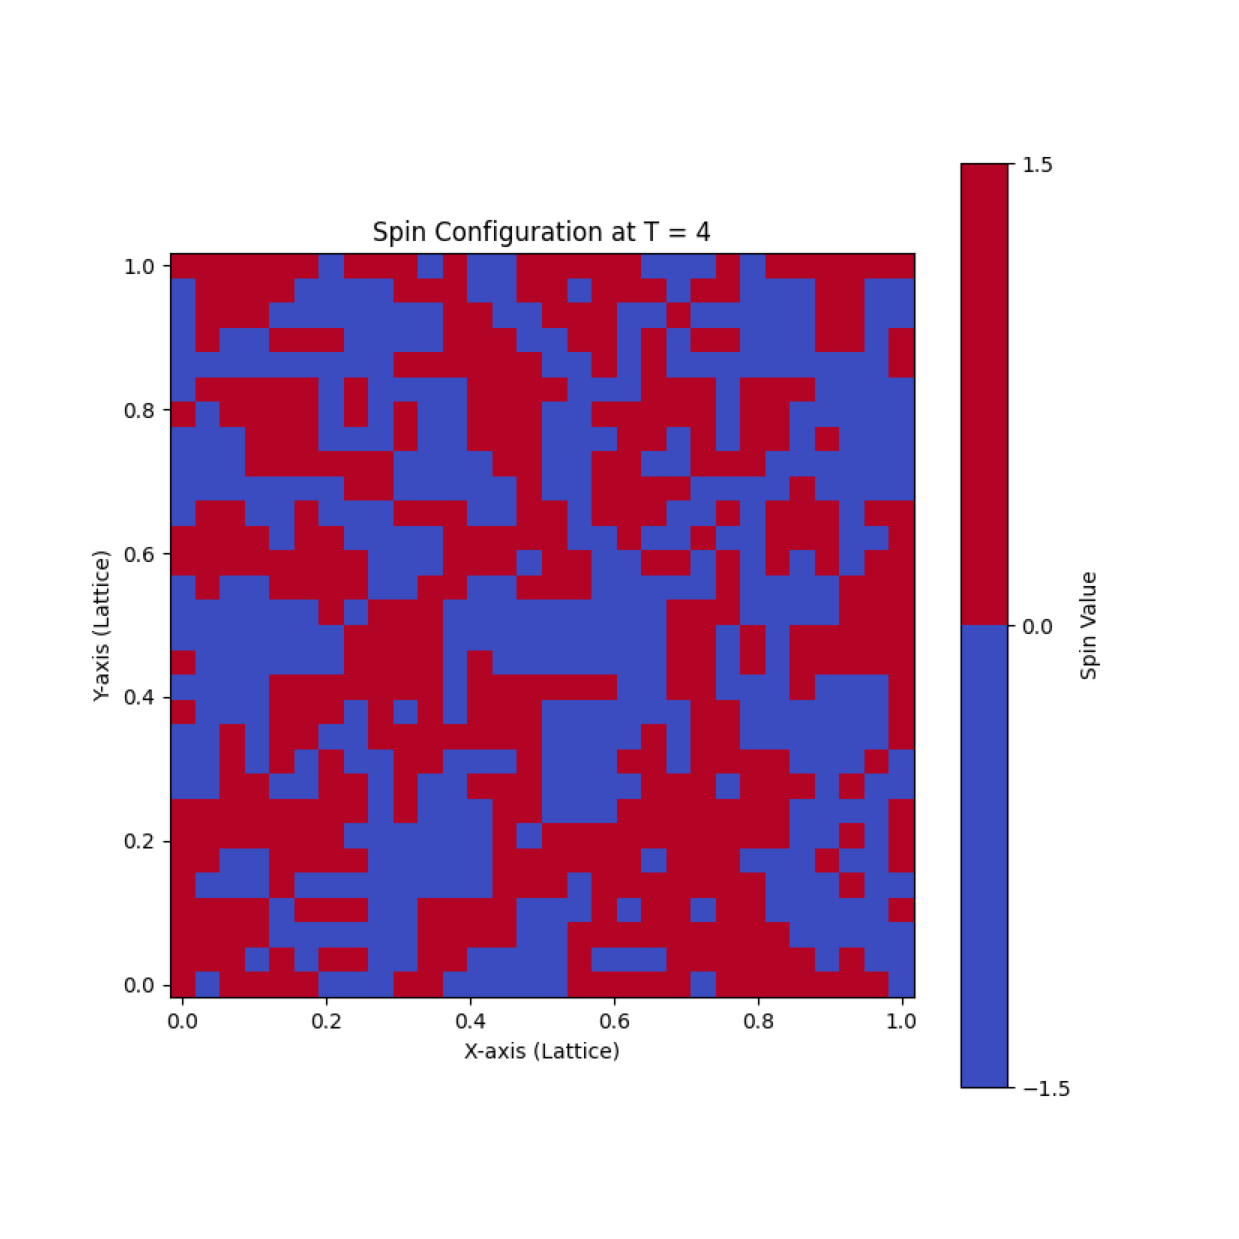

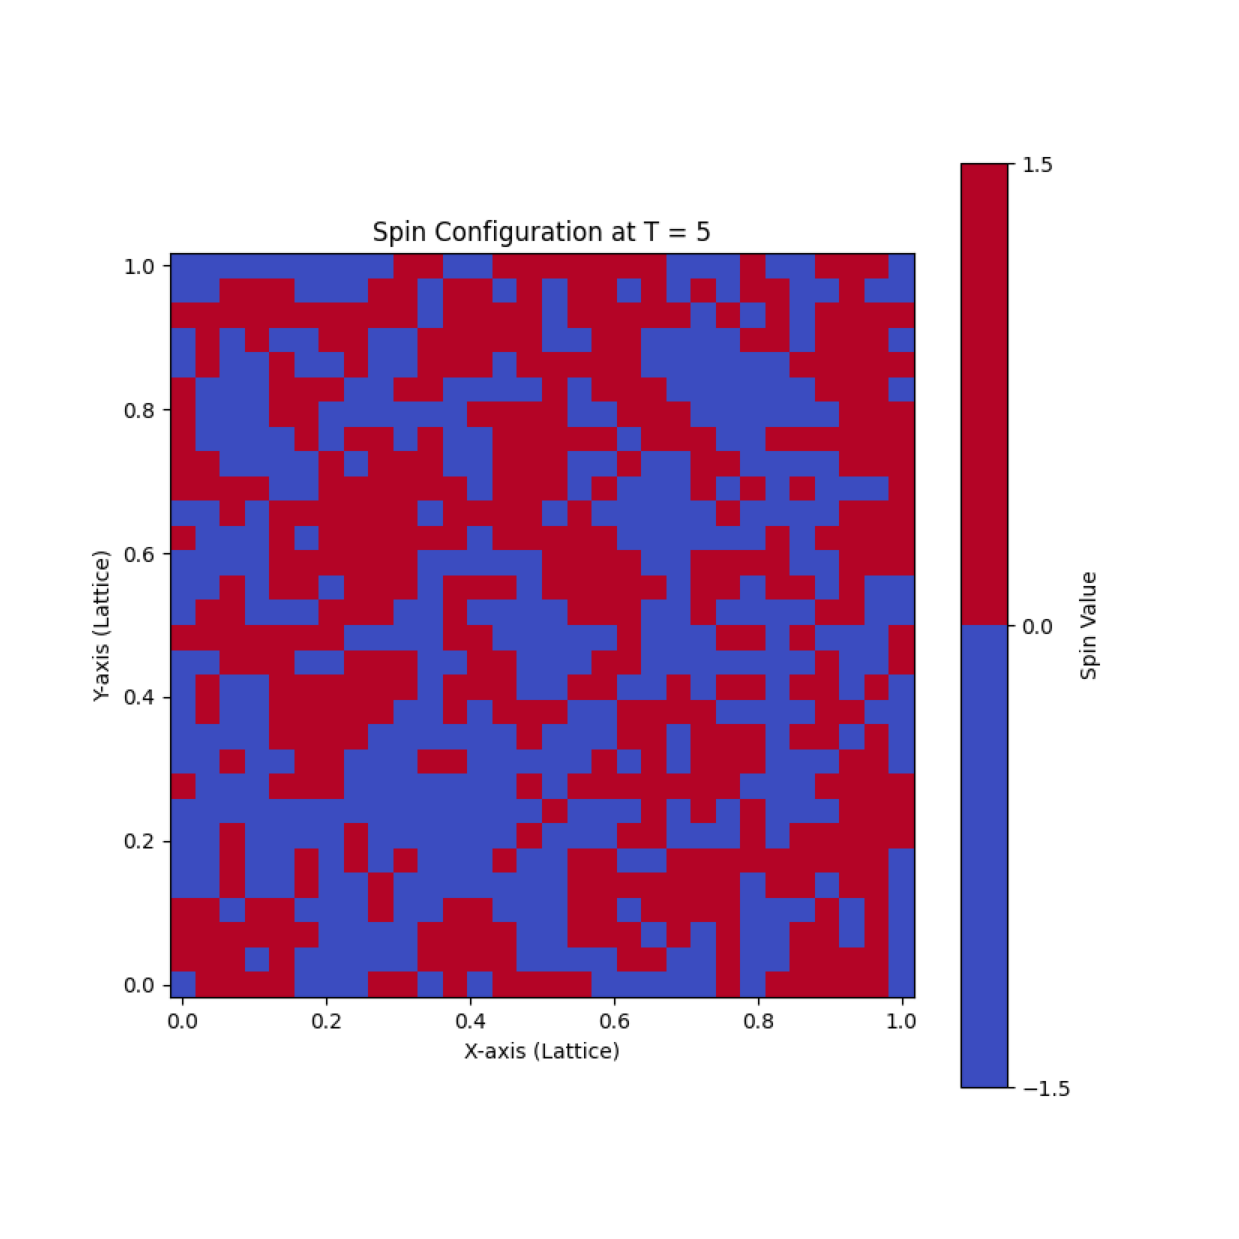

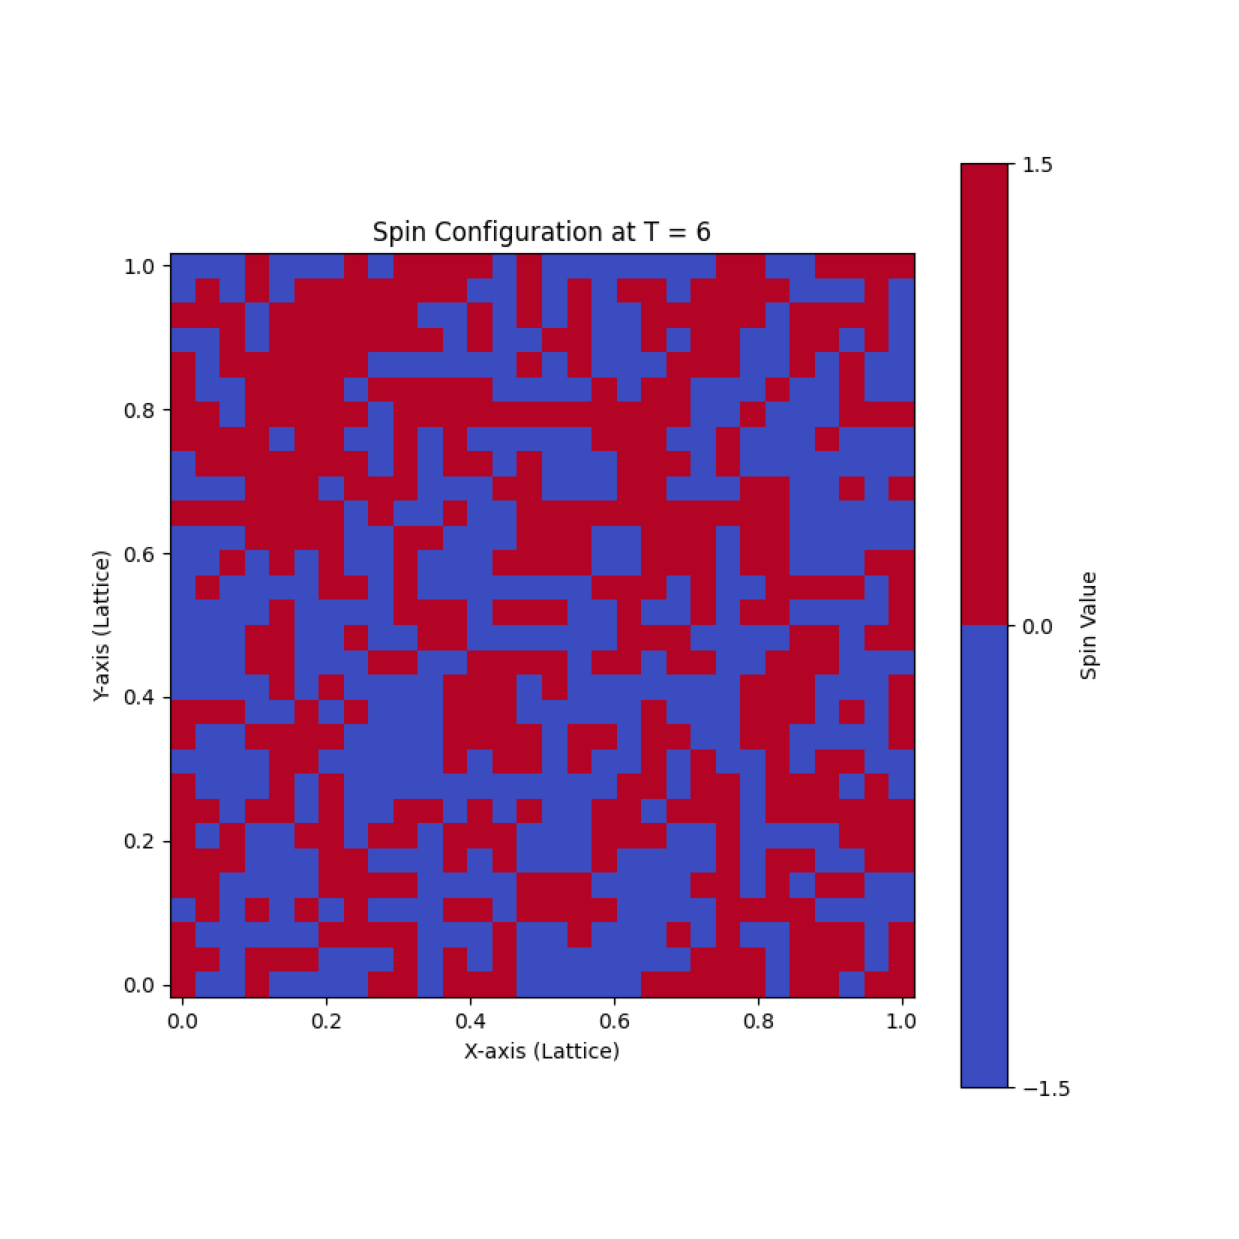

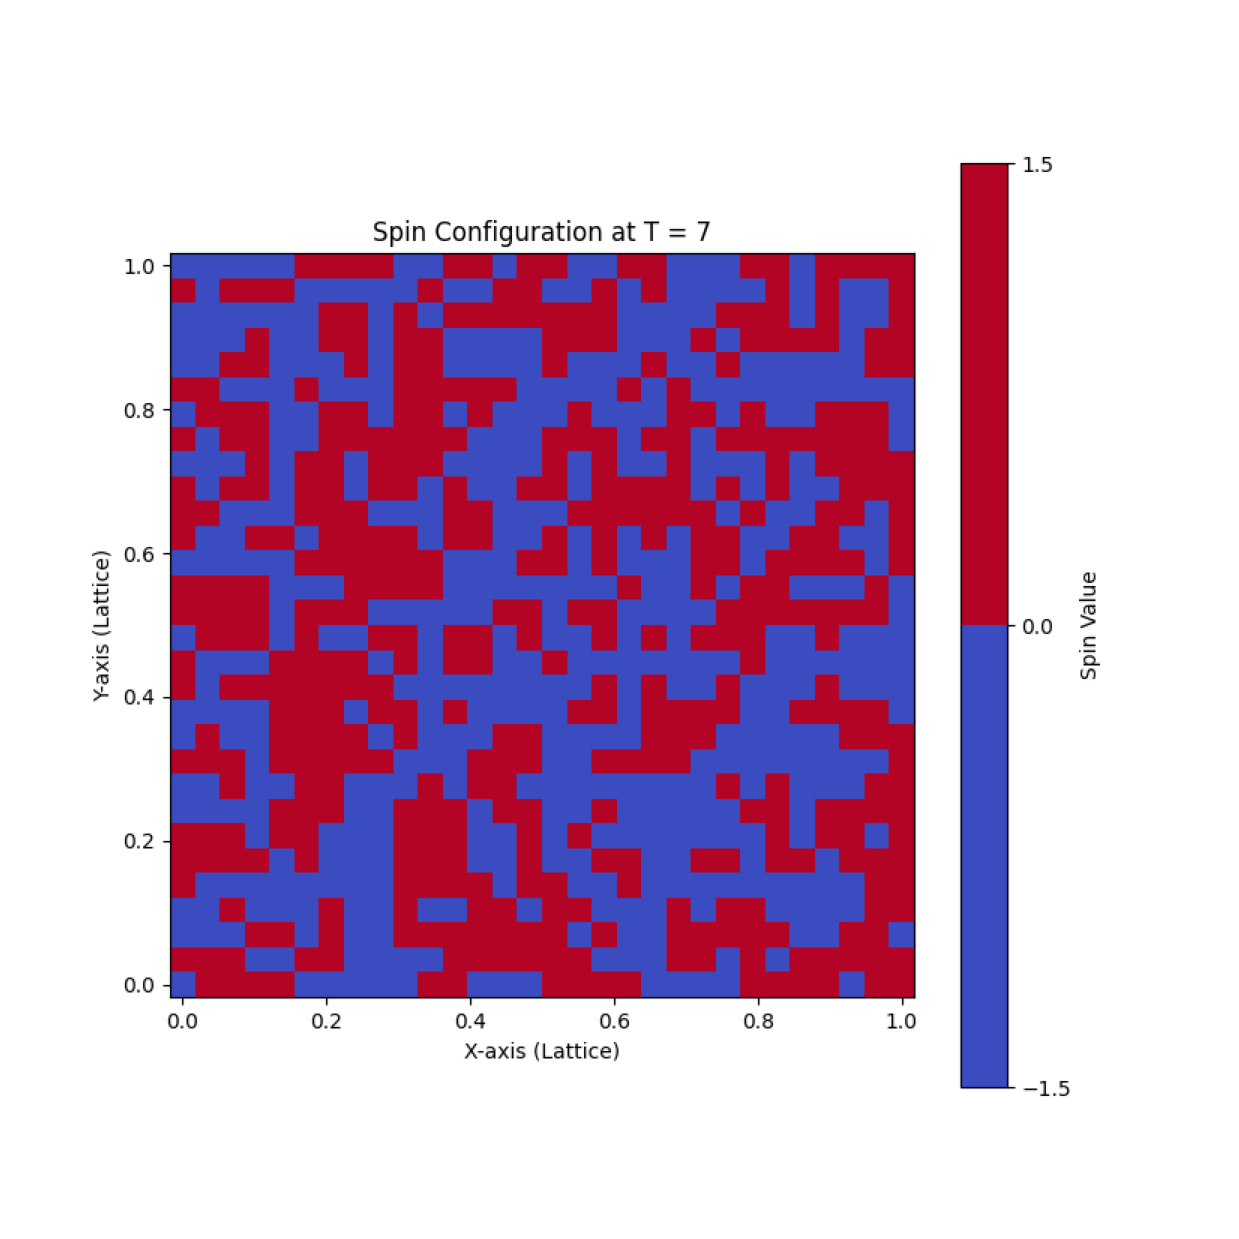

In [15]:
# Animating the plots to have a a visual representation
for T in T_array:
  frames = anim_array[T]

  fig, ax = plt.subplots(figsize=(6, 6), dpi=200)
  im = ax.imshow(frames[0], animated=True)

  # Removing unecessary bounding box
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_frame_on(False)
  ax.set_axis_off()  # Completely remove axes
  fig.patch.set_visible(False)
  plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove padding

  def update(frame):
      im.set_array(frame)
      return im,

  # Correcting T for filesave purposes
  if T < 1:
    T = 0

  ani = anim.FuncAnimation(fig, update, frames=frames, interval=100, blit=True)
  gif_filename = f"ising_model_simulation_{T}.gif"
  ani.save("ising_model_simulation_" + str(T) + ".gif", writer=anim.PillowWriter(fps=10))
  # ani.save("ising_model_simulation_" + str(T) + ".mp4", writer = "ffmpeg", fps = 10)
  files.download("/content/ising_model_simulation_" + str(T) + ".gif")